# Car Price Prediction: Feature Engineering Magic

Hey there! Welcome to this notebook where we're diving into car price prediction. We'll be playing around with some cool feature engineering tricks to see if we can boost our model's performance. From basic car specs to some nifty custom features, we'll explore what really makes a car's price tick. Let's see if we can outsmart the market with some data science wizardry!

In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning

In [34]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploratory Data Analysis (EDA)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [37]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [38]:
data.duplicated().sum()

np.int64(0)

In [39]:
data = data.drop('car_ID', axis=1)

In [40]:
fig = px.histogram(data, x='price', nbins=30,
                   title='Distribution of Car Prices',
                   labels={'price': 'Price', 'count': 'Frequency'},
                   opacity=0.7)

fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Frequency',
    bargap=0.1,
)

fig.update_traces(marker_line_width=1, marker_line_color="white")
fig.show()

In [41]:
fig = px.box(data, x='carbody', y='price',
             title='Car Prices by Car Body Type',
             labels={'carbody': 'Car Body Type', 'price': 'Price'})

fig.update_layout(
    xaxis_title='Car Body Type',
    yaxis_title='Price',
    plot_bgcolor='white'
)

fig.update_xaxes(gridcolor='lightgrey')
fig.update_yaxes(gridcolor='lightgrey')

fig.show()

In [42]:
fig = px.scatter(data,
                 x='enginesize',
                 y='horsepower',
                 opacity=0.7,
                 labels={'enginesize': 'Engine Size', 'horsepower': 'Horsepower'},
                 title='Engine Size vs. Horsepower')

fig.show()

In [43]:
fueltype_counts = data['fueltype'].value_counts().reset_index()
fueltype_counts.columns = ['fueltype', 'count']

fig = px.pie(fueltype_counts,
             names='fueltype',
             values='count',
             title='Distribution of Fuel Types',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(rotation=140, textinfo='percent+label')

fig.show()

# Feature Engineering

**Extract the brand name from 'CarName' and drop the original column**

In [44]:
def extract_brand(name):
    return name.split()[0].lower()

data['brand'] = data['CarName'].apply(extract_brand)
data = data.drop('CarName', axis=1)

In [45]:
data['weight_per_hp'] = data['curbweight'] / data['horsepower']
data['size'] = data['carlength'] * data['carwidth'] * data['carheight']
brand_luxury = data.groupby('brand')['price'].mean().sort_values(ascending=False)
brand_luxury_index = {brand: index for index, brand in enumerate(brand_luxury.index)}
data['brand_luxury_index'] = data['brand'].map(brand_luxury_index)

In [46]:
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
data['cylindernumber'] = data['cylindernumber'].map(cylinder_mapping)
data = data.dropna(subset=['cylindernumber'])
data['cylindernumber'] = data['cylindernumber'].astype(int)


doornumber_mapping = {
    'two': 2,
    'four': 4
}
data['doornumber'] = data['doornumber'].map(doornumber_mapping)
data = data.dropna(subset=['doornumber'])
data['doornumber'] = data['doornumber'].astype(int)

**One-hot encode categorical features**

In [47]:
categorical_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
                        'enginetype', 'fuelsystem', 'brand']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

**Prepare numeric features**

In [48]:
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
                    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
                    'highwaympg', 'weight_per_hp', 'size', 'cylindernumber', 'doornumber']

features = numeric_features + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]

In [49]:
numeric_data = data_encoded.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_with_price = correlation_matrix['price'].drop('price').sort_values(ascending=False).reset_index()
correlation_with_price.columns = ['Feature', 'Correlation with Price']

fig = px.bar(correlation_with_price,
             x='Feature',
             y='Correlation with Price',
             title='Correlation of Features with Price',
             labels={'Correlation with Price': 'Correlation Coefficient'},
             color='Correlation with Price',
             color_continuous_scale='viridis')

fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Correlation Coefficient',
    xaxis=dict(tickangle=90)
)

fig.show()

> **Here, we can notice that the features we added ('size', 'weight_per_hp', 'brand_luxury_index') have a decent impact on the price.**

# Analisis Deskriptif

**Scatter plot, standar deviansi, rata-rata, visualisasi regresi linear**

In [50]:
features = data_encoded.columns.drop('price')
a = 0
for i in features:
    print(i)
    a += 1
print(a)

symboling
doornumber
wheelbase
carlength
carwidth
carheight
curbweight
cylindernumber
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
weight_per_hp
size
brand_luxury_index
fueltype_gas
aspiration_turbo
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
drivewheel_fwd
drivewheel_rwd
enginelocation_rear
enginetype_dohcv
enginetype_l
enginetype_ohc
enginetype_ohcf
enginetype_ohcv
enginetype_rotor
fuelsystem_2bbl
fuelsystem_4bbl
fuelsystem_idi
fuelsystem_mfi
fuelsystem_mpfi
fuelsystem_spdi
fuelsystem_spfi
brand_audi
brand_bmw
brand_buick
brand_chevrolet
brand_dodge
brand_honda
brand_isuzu
brand_jaguar
brand_maxda
brand_mazda
brand_mercury
brand_mitsubishi
brand_nissan
brand_peugeot
brand_plymouth
brand_porcshce
brand_porsche
brand_renault
brand_saab
brand_subaru
brand_toyota
brand_toyouta
brand_vokswagen
brand_volkswagen
brand_volvo
brand_vw
67


In [54]:
x = data_encoded[['carlength', 'carwidth', 'carheight']]
y = data_encoded['price']

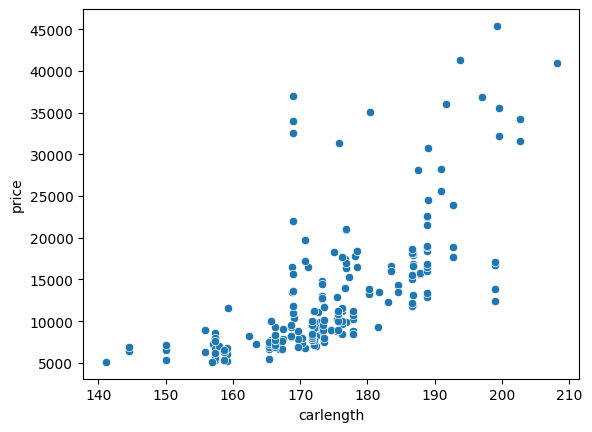

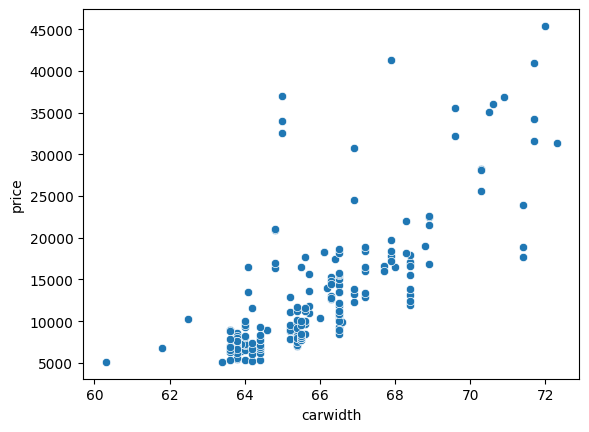

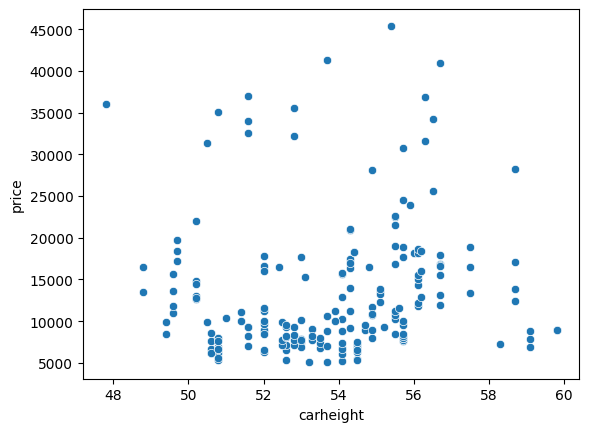

In [57]:
for i in x:
    sns.scatterplot(data=data_encoded, x=i, y=y)
    # plt.title(f'{i} vs {y}')
    plt.show()

In [59]:
features = data_encoded.columns.drop('price')
x = data_encoded[features]
y = data_encoded['price']

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('Standar Deviasi Residual (RMSE):', rmse)

Standar Deviasi Residual (RMSE): 1427.4533586527673


In [60]:
data_encoded.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,weight_per_hp,size,brand_luxury_index
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,26.236739,618719.288873,13.790244
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,5.757329,79463.195262,6.495089
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,11.687500,452643.156000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,22.477612,566490.600000,10.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,26.454545,601385.700000,15.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,29.250000,666250.200000,18.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,50.161290,846007.659000,26.000000


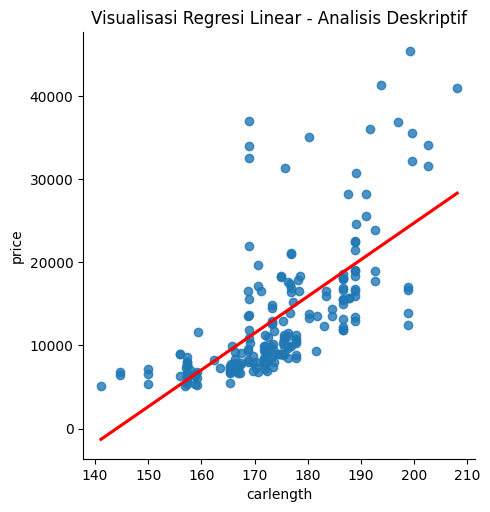

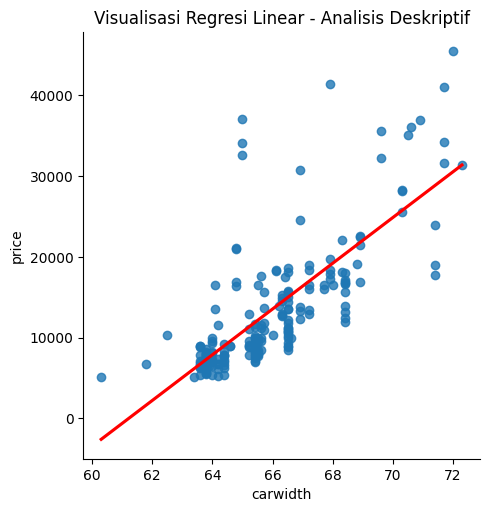

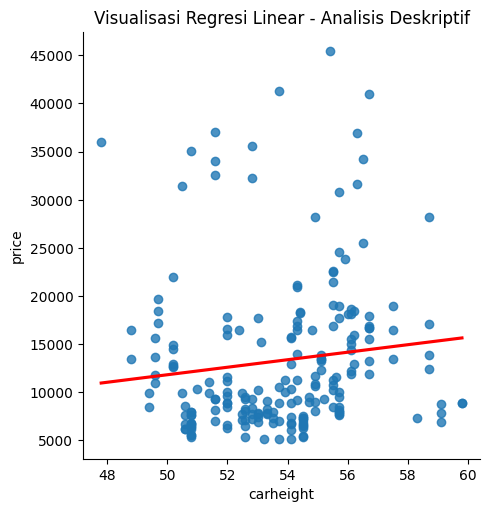

In [71]:
x = ['carlength', 'carwidth', 'carheight']
y = 'price'

for i in x:
    sns.lmplot(x=i, y=y, data=data_encoded, ci=None, line_kws={"color":"red"})
    plt.title("Visualisasi Regresi Linear - Analisis Deskriptif")
    # plt.xlabel(f'{i}')
    # plt.ylabel(f'{y}')
    plt.show()


# Data Preparation

**Prepare data for model training by splitting and scaling**

In [20]:
features = data_encoded.columns.drop('price')
X = data_encoded[features]
y = data_encoded['price']

**Trains a Linear Regression model on the training data and evaluates it on the test data**

---


**Returns R-squared and Mean Squared Error of the model's predictions**

In [21]:
def evaluate_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, y_train)
    y_pred = lin_reg.predict(X_test_scaled)

    return r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

# Model Evaluation

**Find the best random state for the model**

In [ ]:
best_r2, best_mse, best_random_state = -np.inf, np.inf, None
for state in range(1, 201):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    r2, mse = evaluate_model(X_train, X_test, y_train, y_test)

    if r2 > best_r2:
        best_r2, best_mse, best_random_state = r2, mse, state

print(f"Best Random State: {best_random_state}")
print(f"Best R-squared: {best_r2:.4f}")

Best Random State: 16
Best R-squared: 0.9592


In [23]:
# ignore the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def evaluate_ridge_lasso(X_train, X_test, y_train, y_test, alphas):
    best_ridge_alpha = None
    best_lasso_alpha = None
    best_ridge_r2 = -np.inf
    best_lasso_r2 = -np.inf
    best_ridge_mse = np.inf
    best_lasso_mse = np.inf

    for alpha in alphas:
        # Ridge Regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        y_pred_ridge = ridge.predict(X_test)

        r2_ridge = r2_score(y_test, y_pred_ridge)
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)

        if r2_ridge > best_ridge_r2:
            best_ridge_r2 = r2_ridge
            best_ridge_mse = mse_ridge
            best_ridge_alpha = alpha

        # Lasso Regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        y_pred_lasso = lasso.predict(X_test)

        r2_lasso = r2_score(y_test, y_pred_lasso)
        mse_lasso = mean_squared_error(y_test, y_pred_lasso)

        if r2_lasso > best_lasso_r2:
            best_lasso_r2 = r2_lasso
            best_lasso_mse = mse_lasso
            best_lasso_alpha = alpha

    return {
        'best_ridge_alpha': best_ridge_alpha,
        'best_ridge_r2': best_ridge_r2,
        'best_ridge_mse': best_ridge_mse,
        'best_lasso_alpha': best_lasso_alpha,
        'best_lasso_r2': best_lasso_r2,
        'best_lasso_mse': best_lasso_mse,
    }

**Split the scaled data and evaluate Ridge and Lasso regressions**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=best_random_state)

alphas = np.logspace(-4, 4, 50)

results = evaluate_ridge_lasso(X_train, X_test, y_train, y_test, alphas)

print(f"Best Ridge Alpha: {results['best_ridge_alpha']}")
print(f"Best Ridge R-squared: {results['best_ridge_r2']:.4f}")
print(f"Best Ridge MSE: {results['best_ridge_mse']:.4f}")

print(f"Best Lasso Alpha: {results['best_lasso_alpha']}")
print(f"Best Lasso R-squared: {results['best_lasso_r2']:.4f}")
print(f"Best Lasso MSE: {results['best_lasso_mse']:.4f}")

Best Ridge Alpha: 1.7575106248547894
Best Ridge R-squared: 0.9727
Best Ridge MSE: 2045960.5092
Best Lasso Alpha: 11.513953993264458
Best Lasso R-squared: 0.9722
Best Lasso MSE: 2078624.4644


# Conclusion

In this notebook, we've conducted a comprehensive analysis of car price prediction using various regression techniques. Here's a summary of our key findings and processes:

1. **Data Exploration and Preprocessing:**
   - We started with exploratory data analysis to understand the distribution of car prices and the relationships between different features.
   - We handled missing values, removed duplicates, and encoded categorical variables.

2. **Feature Engineering:**
   - We created new features such as 'weight_per_hp', 'size', and 'brand_luxury_index' to capture more complex relationships in the data.
   - We also extracted the car brand from the car name and created a luxury index based on average brand prices.

3. **Model Development:**
   - We implemented three regression models: Linear Regression, Ridge Regression, and Lasso Regression.
   - We used StandardScaler to normalize our features and prevent scale-related biases in our models.
   - We employed cross-validation to find the best hyperparameters for Ridge and Lasso models.
   
4. **Model Evaluation:**
   - We evaluated our models using R-squared and Mean Squared Error metrics.
   
This project demonstrates the power of feature engineering and regularization techniques in improving predictive models. It also highlights the importance of thorough exploratory data analysis and the value of comparing multiple modeling approaches.

I hope this notebook provides useful insights into the factors affecting car prices and serves as a solid foundation for further analysis in this domain.